# Apriori Algorithm

Apriori algorithm is an unsupervised machine learning algorithm used for association rule learning. Association rule learning is a data mining technique that identifies frequent patterns, connections, and dependencies among different groups of items called itemsets in data.

Role of Association Rule, for example how tea is related to sugar in a super store.
* Market basket analysis
* Placing the products in a super market to improve sales.

Let's look at an example with a basic dataset.

In [3]:
pip install efficient_apriori

Note: you may need to restart the kernel to use updated packages.


In [5]:
from efficient_apriori import apriori

In [7]:
transactions = [{'eggs', 'bacon', 'soup', 'milk'},
               {'eggs', 'bacon', 'apple', 'milk'},
               {'soup', 'bacon', 'banana'}]

transactions

[{'bacon', 'eggs', 'milk', 'soup'},
 {'apple', 'bacon', 'eggs', 'milk'},
 {'bacon', 'banana', 'soup'}]

We want to identify the association rule mining in these 3 transactions.

We try to find the antecedent and consequent in the association.

{Bread, Egg}   ==>   {Milk}
 Antecedent        Consequent

Itemset = {Bread, Egg, Milk}

Then we use various metric to help us understand the strength of association between antecedent and consequent.

1. Support -
   * Support([X] -> [Y]) = (Transactions containing X and Y) / (Total number of transactions)
   * In our example, eggs and bacon are sold together 2 out of 3 times, 66% support
2. Confidence -
   * Confidence([X] -> [Y]) = (Transactions containing X and Y) / (Transactions containing X)
   * In our example, if eggs are getting sold, then bacons are getting sold, 100% confidence
3. Lift -
   * Lift([X] -> [Y]) =  ((Transactions containing X and Y) / (Transactions containing X))/(Fraction of transactions containing Y)

In [13]:
itemsets, rules = apriori(transactions)

itemsets

{1: {('bacon',): 3, ('soup',): 2, ('milk',): 2, ('eggs',): 2},
 2: {('bacon', 'eggs'): 2,
  ('bacon', 'milk'): 2,
  ('bacon', 'soup'): 2,
  ('eggs', 'milk'): 2},
 3: {('bacon', 'eggs', 'milk'): 2}}

In [15]:
rules

[{eggs} -> {bacon},
 {bacon} -> {eggs},
 {milk} -> {bacon},
 {bacon} -> {milk},
 {soup} -> {bacon},
 {bacon} -> {soup},
 {milk} -> {eggs},
 {eggs} -> {milk},
 {eggs, milk} -> {bacon},
 {bacon, milk} -> {eggs},
 {bacon, eggs} -> {milk},
 {milk} -> {bacon, eggs},
 {eggs} -> {bacon, milk},
 {bacon} -> {eggs, milk}]

In [17]:
for rule in rules:
    print(rule)

{eggs} -> {bacon} (conf: 1.000, supp: 0.667, lift: 1.000, conv: 0.000)
{bacon} -> {eggs} (conf: 0.667, supp: 0.667, lift: 1.000, conv: 1.000)
{milk} -> {bacon} (conf: 1.000, supp: 0.667, lift: 1.000, conv: 0.000)
{bacon} -> {milk} (conf: 0.667, supp: 0.667, lift: 1.000, conv: 1.000)
{soup} -> {bacon} (conf: 1.000, supp: 0.667, lift: 1.000, conv: 0.000)
{bacon} -> {soup} (conf: 0.667, supp: 0.667, lift: 1.000, conv: 1.000)
{milk} -> {eggs} (conf: 1.000, supp: 0.667, lift: 1.500, conv: 333333333.333)
{eggs} -> {milk} (conf: 1.000, supp: 0.667, lift: 1.500, conv: 333333333.333)
{eggs, milk} -> {bacon} (conf: 1.000, supp: 0.667, lift: 1.000, conv: 0.000)
{bacon, milk} -> {eggs} (conf: 1.000, supp: 0.667, lift: 1.500, conv: 333333333.333)
{bacon, eggs} -> {milk} (conf: 1.000, supp: 0.667, lift: 1.500, conv: 333333333.333)
{milk} -> {bacon, eggs} (conf: 1.000, supp: 0.667, lift: 1.500, conv: 333333333.333)
{eggs} -> {bacon, milk} (conf: 1.000, supp: 0.667, lift: 1.500, conv: 333333333.333)
{

In [35]:
rules_rhs = [rule.rhs for rule in rules]
rules_rhs

[('bacon',),
 ('eggs',),
 ('bacon',),
 ('milk',),
 ('bacon',),
 ('soup',),
 ('eggs',),
 ('milk',),
 ('bacon',),
 ('eggs',),
 ('milk',),
 ('bacon', 'eggs'),
 ('bacon', 'milk'),
 ('eggs', 'milk')]

In [45]:
for rule in sorted(rules, key = lambda rule: rule.confidence):
    print(rule)

{bacon} -> {eggs} (conf: 0.667, supp: 0.667, lift: 1.000, conv: 1.000)
{bacon} -> {milk} (conf: 0.667, supp: 0.667, lift: 1.000, conv: 1.000)
{bacon} -> {soup} (conf: 0.667, supp: 0.667, lift: 1.000, conv: 1.000)
{bacon} -> {eggs, milk} (conf: 0.667, supp: 0.667, lift: 1.000, conv: 1.000)
{eggs} -> {bacon} (conf: 1.000, supp: 0.667, lift: 1.000, conv: 0.000)
{milk} -> {bacon} (conf: 1.000, supp: 0.667, lift: 1.000, conv: 0.000)
{soup} -> {bacon} (conf: 1.000, supp: 0.667, lift: 1.000, conv: 0.000)
{milk} -> {eggs} (conf: 1.000, supp: 0.667, lift: 1.500, conv: 333333333.333)
{eggs} -> {milk} (conf: 1.000, supp: 0.667, lift: 1.500, conv: 333333333.333)
{eggs, milk} -> {bacon} (conf: 1.000, supp: 0.667, lift: 1.000, conv: 0.000)
{bacon, milk} -> {eggs} (conf: 1.000, supp: 0.667, lift: 1.500, conv: 333333333.333)
{bacon, eggs} -> {milk} (conf: 1.000, supp: 0.667, lift: 1.500, conv: 333333333.333)
{milk} -> {bacon, eggs} (conf: 1.000, supp: 0.667, lift: 1.500, conv: 333333333.333)
{eggs} ->

In [59]:
rules1 = list(filter((lambda rule: (len(rule.lhs) == 1) and len(rule.rhs) == 1), rules))
rules1

[{eggs} -> {bacon},
 {bacon} -> {eggs},
 {milk} -> {bacon},
 {bacon} -> {milk},
 {soup} -> {bacon},
 {bacon} -> {soup},
 {milk} -> {eggs},
 {eggs} -> {milk}]

In [61]:
for rule in rules1:
    print(rule)

{eggs} -> {bacon} (conf: 1.000, supp: 0.667, lift: 1.000, conv: 0.000)
{bacon} -> {eggs} (conf: 0.667, supp: 0.667, lift: 1.000, conv: 1.000)
{milk} -> {bacon} (conf: 1.000, supp: 0.667, lift: 1.000, conv: 0.000)
{bacon} -> {milk} (conf: 0.667, supp: 0.667, lift: 1.000, conv: 1.000)
{soup} -> {bacon} (conf: 1.000, supp: 0.667, lift: 1.000, conv: 0.000)
{bacon} -> {soup} (conf: 0.667, supp: 0.667, lift: 1.000, conv: 1.000)
{milk} -> {eggs} (conf: 1.000, supp: 0.667, lift: 1.500, conv: 333333333.333)
{eggs} -> {milk} (conf: 1.000, supp: 0.667, lift: 1.500, conv: 333333333.333)


How do we interpret this?

* 100% of customer who bought eggs also bought bacon.
* 67% of customers who bought bacon also bought soup.
  

We can also implement Apriori algorithm using MLXtend library.

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

import time
import logging

In [126]:
transactions = [['milk', 'water'],
               ['milk', 'bread'],
               ['milk', 'bread', 'water']]
transactions

[['milk', 'water'], ['milk', 'bread'], ['milk', 'bread', 'water']]

TransactionEncoder encodes database transaction data in form of a Python list of lists into a NumPy array which is suitable for typical Machine Learning APIs.

In [128]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
te_ary

array([[False,  True,  True],
       [ True,  True, False],
       [ True,  True,  True]])

Using te.fit() method, the TransactionEncoder learns the unique labels in the dataset, and via the transform() method, it transforms the input dataset (a Python list of lists) into a one-hot encoded NumPy boolean array.

In [130]:
te.columns_

['bread', 'milk', 'water']

In [132]:
df = pd.DataFrame(te_ary, columns = te.columns_)
df

,bread,milk,water
0,False,True,True
1,True,True,False
2,True,True,True


In [134]:
frequent_itemsets = apriori(df, min_support = 0.00001, use_colnames = True)
frequent_itemsets

,support,itemsets
0,0.666667,(bread)
1,1.000000,(milk)
2,0.666667,(water)
3,0.666667,"(milk, bread)"
4,0.333333,"(water, bread)"
5,0.666667,"(water, milk)"
6,0.333333,"(water, milk, bread)"


In [144]:
confidence = association_rules(frequent_itemsets, metric = "confidence", min_threshold = 0.001, num_itemsets = len(df))

confidence

/opt/anaconda3/lib/python3.12/site-packages/mlxtend/frequent_patterns/association_rules.py:182: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(milk),(bread),1.000000,0.666667,0.666667,0.666667,1.00,1.0,0.000000,1.000000,0.0,0.666667,0.0,0.833333
1,(bread),(milk),0.666667,1.000000,0.666667,1.000000,1.00,1.0,0.000000,inf,0.0,0.666667,0.0,0.833333
2,(water),(bread),0.666667,0.666667,0.333333,0.500000,0.75,1.0,-0.111111,0.666667,-0.5,0.333333,-0.5,0.500000
3,(bread),(water),0.666667,0.666667,0.333333,0.500000,0.75,1.0,-0.111111,0.666667,-0.5,0.333333,-0.5,0.500000
4,(water),(milk),0.666667,1.000000,0.666667,1.000000,1.00,1.0,0.000000,inf,0.0,0.666667,0.0,0.833333
5,(milk),(water),1.000000,0.666667,0.666667,0.666667,1.00,1.0,0.000000,1.000000,0.0,0.666667,0.0,0.833333
6,"(water, milk)",(bread),0.666667,0.666667,0.333333,0.500000,0.75,1.0,-0.111111,0.666667,-0.5,0.333333,-0.5,0.500000
7,"(water, bread)",(milk),0.333333,1.000000,0.333333,1.000000,1.00,1.0,0.000000,inf,0.0,0.333333,0.0,0.666667
8,"(milk, bread)",(water),0.666667,0.666667,0.333333,0.500000,0.75,1.0,-0.111111,0.666667,-0.5,0.333333,-0.5,0.500000
9,(water),"(milk, bread)",0.666667,0.666667,0.333333,0.500000,0.75,1.0,-0.111111,0.666667,-0.5,0.333333,-0.5,0.500000


In [146]:
df_out = confidence[['antecedents', 'consequents', 'support', 'confidence']]
df_out

,antecedents,consequents,support,confidence
0,(milk),(bread),0.666667,0.666667
1,(bread),(milk),0.666667,1.000000
2,(water),(bread),0.333333,0.500000
3,(bread),(water),0.333333,0.500000
4,(water),(milk),0.666667,1.000000
5,(milk),(water),0.666667,0.666667
6,"(water, milk)",(bread),0.333333,0.500000
7,"(water, bread)",(milk),0.333333,1.000000
8,"(milk, bread)",(water),0.333333,0.500000
9,(water),"(milk, bread)",0.333333,0.500000


In [150]:
df_out[df_out['support'] > 0.5]

,antecedents,consequents,support,confidence
0,(milk),(bread),0.666667,0.666667
1,(bread),(milk),0.666667,1.000000
4,(water),(milk),0.666667,1.000000
5,(milk),(water),0.666667,0.666667


In [154]:
support = association_rules(frequent_itemsets, metric = "support", min_threshold = 0.001, num_itemsets = len(df))

support

/opt/anaconda3/lib/python3.12/site-packages/mlxtend/frequent_patterns/association_rules.py:182: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(milk),(bread),1.000000,0.666667,0.666667,0.666667,1.00,1.0,0.000000,1.000000,0.0,0.666667,0.0,0.833333
1,(bread),(milk),0.666667,1.000000,0.666667,1.000000,1.00,1.0,0.000000,inf,0.0,0.666667,0.0,0.833333
2,(water),(bread),0.666667,0.666667,0.333333,0.500000,0.75,1.0,-0.111111,0.666667,-0.5,0.333333,-0.5,0.500000
3,(bread),(water),0.666667,0.666667,0.333333,0.500000,0.75,1.0,-0.111111,0.666667,-0.5,0.333333,-0.5,0.500000
4,(water),(milk),0.666667,1.000000,0.666667,1.000000,1.00,1.0,0.000000,inf,0.0,0.666667,0.0,0.833333
5,(milk),(water),1.000000,0.666667,0.666667,0.666667,1.00,1.0,0.000000,1.000000,0.0,0.666667,0.0,0.833333
6,"(water, milk)",(bread),0.666667,0.666667,0.333333,0.500000,0.75,1.0,-0.111111,0.666667,-0.5,0.333333,-0.5,0.500000
7,"(water, bread)",(milk),0.333333,1.000000,0.333333,1.000000,1.00,1.0,0.000000,inf,0.0,0.333333,0.0,0.666667
8,"(milk, bread)",(water),0.666667,0.666667,0.333333,0.500000,0.75,1.0,-0.111111,0.666667,-0.5,0.333333,-0.5,0.500000
9,(water),"(milk, bread)",0.666667,0.666667,0.333333,0.500000,0.75,1.0,-0.111111,0.666667,-0.5,0.333333,-0.5,0.500000


In [156]:
support[['antecedents', 'consequents', 'support', 'confidence']]

,antecedents,consequents,support,confidence
0,(milk),(bread),0.666667,0.666667
1,(bread),(milk),0.666667,1.000000
2,(water),(bread),0.333333,0.500000
3,(bread),(water),0.333333,0.500000
4,(water),(milk),0.666667,1.000000
5,(milk),(water),0.666667,0.666667
6,"(water, milk)",(bread),0.333333,0.500000
7,"(water, bread)",(milk),0.333333,1.000000
8,"(milk, bread)",(water),0.333333,0.500000
9,(water),"(milk, bread)",0.333333,0.500000


In [160]:
lift = association_rules(frequent_itemsets, metric = "lift", min_threshold = 0.001, num_itemsets = len(df))

lift[['antecedents', 'consequents', 'lift', 'confidence']]

/opt/anaconda3/lib/python3.12/site-packages/mlxtend/frequent_patterns/association_rules.py:182: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


,antecedents,consequents,lift,confidence
0,(milk),(bread),1.00,0.666667
1,(bread),(milk),1.00,1.000000
2,(water),(bread),0.75,0.500000
3,(bread),(water),0.75,0.500000
4,(water),(milk),1.00,1.000000
5,(milk),(water),1.00,0.666667
6,"(water, milk)",(bread),0.75,0.500000
7,"(water, bread)",(milk),1.00,1.000000
8,"(milk, bread)",(water),0.75,0.500000
9,(water),"(milk, bread)",0.75,0.500000


## Case Study

In [163]:
import pandas as pd
import numpy as np
from efficient_apriori import apriori

In [165]:
store_data = pd.read_csv('store_data.csv').values
store_data

array([['burgers', 'meatballs', 'eggs', ..., nan, nan, nan],
       ['chutney', nan, nan, ..., nan, nan, nan],
       ['turkey', 'avocado', nan, ..., nan, nan, nan],
       ...,
       ['chicken', nan, nan, ..., nan, nan, nan],
       ['escalope', 'green tea', nan, ..., nan, nan, nan],
       ['eggs', 'frozen smoothie', 'yogurt cake', ..., nan, nan, nan]],
      dtype=object)

All rows can have different number of data items. So, we need to clean this data.

In [180]:
records = []

for i in range(0, len(store_data)):
    #print(i)
    records.append([str(store_data[i, j]) for j in range(0, 20) if str(store_data[i, j]) != 'nan'])

records

[['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spaghetti',
  'mineral water',
  'black tea',
  'salmon',
  'eggs',
  'chicken',
  'extra dark chocolate'],
 ['meatballs', 'milk', 'honey', 'french fries', 'protein bar'],
 ['red wine', 'shrimp', 'pasta', 'pepper', 'eggs', 'chocolate', 'shampoo'],
 ['rice', 'sparkling water'],
 ['spaghetti', 'mineral water', 'ham', 'body spray',

In [198]:
itemsets, rules = apriori(records, min_support = 0.01, min_confidence = 0.01)

type(itemsets)

dict

In [200]:
itemsets

{1: {('burgers',): 654,
  ('meatballs',): 157,
  ('eggs',): 1348,
  ('turkey',): 469,
  ('avocado',): 249,
  ('mineral water',): 1787,
  ('milk',): 972,
  ('energy bar',): 203,
  ('whole wheat rice',): 439,
  ('green tea',): 990,
  ('low fat yogurt',): 573,
  ('whole wheat pasta',): 221,
  ('french fries',): 1282,
  ('soup',): 379,
  ('light cream',): 117,
  ('frozen vegetables',): 715,
  ('spaghetti',): 1306,
  ('cookies',): 603,
  ('cooking oil',): 383,
  ('champagne',): 351,
  ('salmon',): 318,
  ('shrimp',): 535,
  ('chocolate',): 1229,
  ('chicken',): 450,
  ('honey',): 355,
  ('oil',): 173,
  ('fresh tuna',): 167,
  ('tomatoes',): 513,
  ('black tea',): 107,
  ('extra dark chocolate',): 90,
  ('protein bar',): 139,
  ('red wine',): 211,
  ('pasta',): 118,
  ('pepper',): 199,
  ('rice',): 141,
  ('ham',): 199,
  ('body spray',): 86,
  ('pancakes',): 713,
  ('grated cheese',): 393,
  ('white wine',): 124,
  ('parmesan cheese',): 149,
  ('fresh bread',): 323,
  ('ground beef',): 737

In [204]:
itemsets.keys()

dict_keys([1, 2, 3])

In [206]:
for i in rules:
    print(i)

{mineral water} -> {avocado} (conf: 0.048, supp: 0.011, lift: 1.450, conv: 1.016)
{avocado} -> {mineral water} (conf: 0.345, supp: 0.011, lift: 1.450, conv: 1.164)
{cake} -> {burgers} (conf: 0.141, supp: 0.011, lift: 1.622, conv: 1.063)
{burgers} -> {cake} (conf: 0.131, supp: 0.011, lift: 1.622, conv: 1.058)
{chocolate} -> {burgers} (conf: 0.104, supp: 0.017, lift: 1.194, conv: 1.019)
{burgers} -> {chocolate} (conf: 0.196, supp: 0.017, lift: 1.194, conv: 1.040)
{eggs} -> {burgers} (conf: 0.160, supp: 0.029, lift: 1.838, conv: 1.087)
{burgers} -> {eggs} (conf: 0.330, supp: 0.029, lift: 1.838, conv: 1.225)
{french fries} -> {burgers} (conf: 0.129, supp: 0.022, lift: 1.476, conv: 1.048)
{burgers} -> {french fries} (conf: 0.252, supp: 0.022, lift: 1.476, conv: 1.109)
{frozen vegetables} -> {burgers} (conf: 0.110, supp: 0.011, lift: 1.267, conv: 1.026)
{burgers} -> {frozen vegetables} (conf: 0.121, supp: 0.011, lift: 1.267, conv: 1.029)
{green tea} -> {burgers} (conf: 0.132, supp: 0.017, li

Let's use MLXTEND library.

In [216]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [214]:
te = TransactionEncoder()
te_ary = te.fit(records).transform(records)

df = pd.DataFrame(te_ary, columns = te.columns_)

frequent_itemsets = apriori(df, min_support = 0.001, use_colnames = True)

frequent_itemsets

,support,itemsets
0,0.020267,(almonds)
1,0.008800,(antioxydant juice)
2,0.004800,(asparagus)
3,0.033200,(avocado)
4,0.004533,(babies food)
...,...,...
6751,0.001467,"(spaghetti, tomatoes, mineral water, milk, fro..."
6752,0.001200,"(spaghetti, turkey, mineral water, milk, froze..."
6753,0.001067,"(spaghetti, tomatoes, olive oil, mineral water..."
6754,0.001067,"(spaghetti, pancakes, ground beef, mineral wat..."


In [220]:
res = association_rules(frequent_itemsets, metric = "confidence", min_threshold = 0.05, num_itemsets = len(df))

res.columns

Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift',
       'representativity', 'leverage', 'conviction', 'zhangs_metric',
       'jaccard', 'certainty', 'kulczynski'],
      dtype='object')

In [224]:
res = res[['antecedents', 'consequents', 'support', 'confidence']]
res

,antecedents,consequents,support,confidence
0,(almonds),(avocado),0.001600,0.078947
1,(almonds),(burgers),0.005200,0.256579
2,(burgers),(almonds),0.005200,0.059633
3,(almonds),(cake),0.003067,0.151316
4,(almonds),(cereals),0.001067,0.052632
...,...,...,...,...
23807,"(chocolate, mineral water, milk)","(ground beef, spaghetti, frozen vegetables)",0.001067,0.076190
23808,"(chocolate, mineral water, frozen vegetables)","(ground beef, spaghetti, milk)",0.001067,0.109589
23809,"(mineral water, milk, frozen vegetables)","(ground beef, spaghetti, chocolate)",0.001067,0.096386
23810,"(chocolate, milk, frozen vegetables)","(ground beef, mineral water, spaghetti)",0.001067,0.133333


<Axes: >

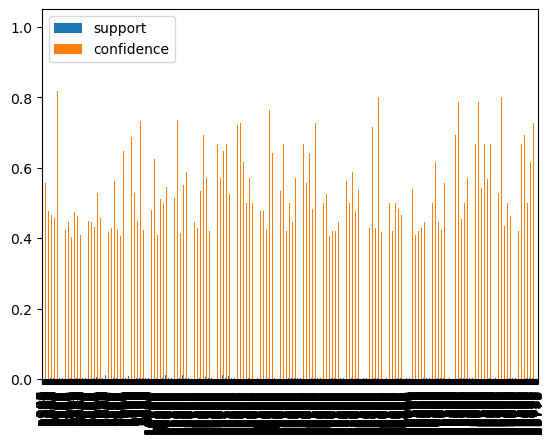

In [230]:
res[res['confidence'] > 0.4].plot(kind = 'bar')